In [53]:
import pandas as pd
import numpy as np
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import seaborn as sns

In [54]:
# Load the csv file into a Pandas DataFrame
df = pd.read_csv('News_Sentiments_India.csv')

In [55]:
# Initialize the sentiment analyzer
sentiment_analyzer = SentimentIntensityAnalyzer()


keywords = ["Mukesh Ambani", "Reliance", "Jio"]
df = df[df['Title'].str.contains('|'.join(keywords), case=False)]


# Calculate the sentiment scores for each headline
df['sentiment'] = df['Title'].apply(lambda x: sentiment_analyzer.polarity_scores(x)['compound'])
df['confidence'] = df['sentiment'].apply(lambda x: 'positive' if x > 0 else 'neutral' if x == 0 else 'negative')


In [56]:
df['sentiment'].head()

1204    0.3612
1254    0.0000
1397   -0.6486
1580    0.0000
1841    0.2500
Name: sentiment, dtype: float64

In [57]:
stock_df = pd.read_csv('RELIANCE.NS.csv')
stock_df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-04-03,664.699341,683.768555,662.247559,680.871033,661.447571,20715169
1,2017-04-05,691.049561,702.342468,683.570435,700.856567,680.862976,18609462
2,2017-04-06,697.884766,717.647400,694.516663,712.496277,692.170593,23361514
3,2017-04-07,703.976990,710.267395,694.690063,696.696045,676.821106,14710432
4,2017-04-10,698.380066,705.760071,682.183594,684.189575,664.671448,14199616
...,...,...,...,...,...,...,...
988,2021-04-05,2024.949951,2025.000000,1962.099976,1992.599976,1980.248413,6864856
989,2021-04-06,2004.000000,2004.949951,1969.000000,1984.300049,1972.000000,6465241
990,2021-04-07,2000.000000,2046.900024,1993.300049,2002.849976,1990.434937,11198918
991,2021-04-08,2011.000000,2022.000000,1993.000000,2005.349976,1992.919434,7092878


In [58]:
df['Date'] = pd.to_datetime(df['Date'])
stock_df['Date'] = pd.to_datetime(stock_df['Date'])

In [59]:
# Merge the sentiment data with the stock data on the date column
merged_df = pd.merge(df, stock_df, left_on='Date', right_on='Date', how='left')

In [60]:
merged_df.dropna(inplace=True)
# calculate the Daily Returns
merged_df['Daily Returns'] = merged_df['Close'].pct_change()



In [61]:
merged_df.tail(10)

,Date,Title,URL,sentiment,confidence,Open,High,Low,Close,Adj Close,Volume,Daily Returns
1753,2021-02-26,Mukesh Ambani is again richest Asian as China ...,https://www.livemint.com/companies/people/muke...,0.2732,positive,2117.000000,2133.899902,2070.699951,2085.800049,2072.870850,17297575.0,-0.027304
1755,2021-03-03,Jio | Airtel : Bharti Airtel looking better pl...,https://economictimes.indiatimes.com/markets/e...,0.4404,positive,2121.050049,2219.899902,2107.199951,2202.100098,2188.449951,14733134.0,0.055758
1756,2021-02-03,"Mukesh Ambani , Gautam Adani see spectacular r...",https://www.businesstoday.in/current/corporate...,0.4939,positive,1928.300049,1952.000000,1900.000000,1930.650024,1918.682617,13984228.0,-0.123269
1761,2021-03-19,Top gainers today : 5 shares rise up to 5 %; N...,https://www.businesstoday.in/markets/company-s...,0.4588,positive,1991.000000,2095.850098,1982.800049,2082.000000,2069.094482,19284892.0,0.078393
1762,2021-03-26,Reliance - Aramco deal likely if crude oil ave...,https://economictimes.indiatimes.com/industry/...,-0.5719,negative,2012.000000,2013.699951,1973.699951,1994.650024,1982.285889,9313160.0,-0.041955
1763,2021-03-25,Reliance to sell partial stake in Den Networks...,https://economictimes.indiatimes.com/markets/s...,0.0000,neutral,2054.000000,2054.000000,1985.000000,1991.449951,1979.105713,10153757.0,-0.001604
1764,2021-03-23,Saudi Aramco remains in discussion to pick sta...,https://economictimes.indiatimes.com/markets/s...,0.0000,neutral,2061.949951,2109.699951,2056.000000,2087.500000,2074.560059,8039865.0,0.048231
1765,2021-03-25,"India will be epicentre of global growth , off...",https://www.businesstoday.in/current/economy-p...,0.6369,positive,2054.000000,2054.000000,1985.000000,1991.449951,1979.105713,10153757.0,-0.046012
1766,2021-03-31,"reliance industries : Play OMCs via Reliance ,...",https://economictimes.indiatimes.com/markets/e...,0.3400,positive,2018.000000,2049.899902,1999.000000,2003.099976,1990.683350,7499740.0,0.005850
1767,2021-02-04,"Jio aggressive strategy , launch of low - cost...",https://economictimes.indiatimes.com/industry/...,-0.4019,negative,1924.000000,1940.000000,1905.000000,1924.300049,1912.371948,11826848.0,-0.039339


In [62]:
import statsmodels.api as sm

X = merged_df['sentiment'].values.reshape(-1, 1)
y = merged_df['Daily_returns'].values.reshape(-1, 1)

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

plt.scatter(X, y)
plt.plot(X, predictions, color='red')
plt.xlabel('Sentiment Score')
plt.ylabel('Daily Returns')
plt.title('Linear Regression between Sentiment Score and Daily Returns')
plt.show()



KeyError: 'Daily Returns'

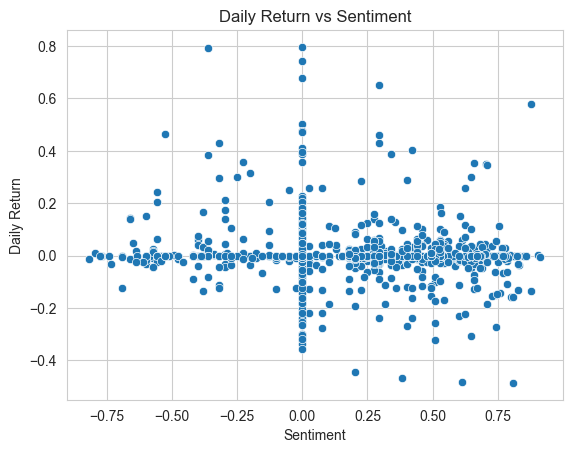

In [ ]:
merged_df['daily_return'] = merged_df['Close'].pct_change()

sns.scatterplot(x='sentiment', y='daily_return', data=merged_df)
plt.xlabel('Sentiment')
plt.ylabel('Daily Return')
plt.title('Daily Return vs Sentiment')
plt.show()


C:\Users\prana\AppData\Local\Temp\ipykernel_11700\1217333555.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df_50.loc[:, 'price_movement'] = merged_df_50['Close'].diff().apply(lambda x: 1 if x > 0 else 0)


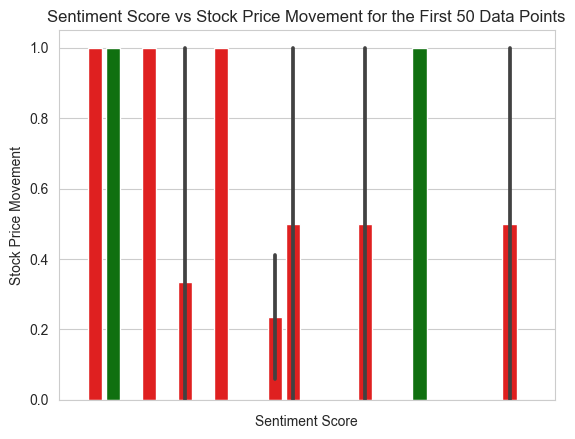

In [ ]:
# Select the first 50 data points in the merged_df dataframe
merged_df_50 = merged_df.head(50)

# Create a new column indicating whether the stock price increased (1) or decreased (0) on the day the news came out
merged_df_50.loc[:, 'price_movement'] = merged_df_50['Close'].diff().apply(lambda x: 1 if x > 0 else 0)

# Plot the bar chart using seaborn
sns.set_style("whitegrid")
sns.barplot(x=merged_df_50['sentiment'], y=merged_df_50['price_movement'], palette=['red' if x == 0 else 'green' for x in merged_df_50['price_movement']])
plt.xlabel('Sentiment Score')
plt.ylabel('Stock Price Movement')
plt.title('Sentiment Score vs Stock Price Movement for the First 50 Data Points')
plt.xticks(np.arange(-1, 1.1, step=0.1)) # Set the x-axis labels to be in intervals of 0.1 from -1 to 1
plt.show()



C:\Users\prana\AppData\Local\Temp\ipykernel_11700\209292523.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df_50['price_movement_next_day'] = merged_df_50['Close'].diff(-1).apply(lambda x: 1 if x > 0 else 0)


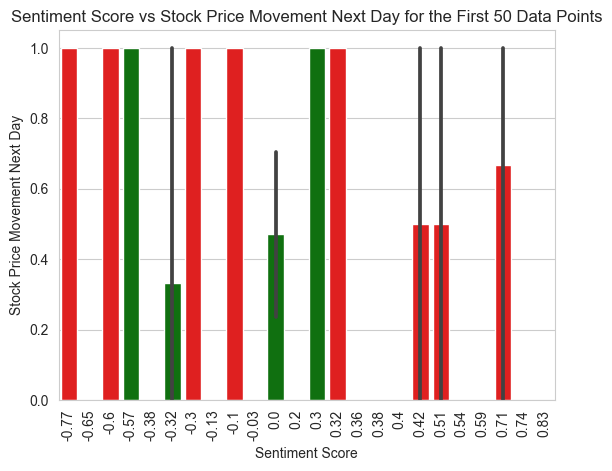

In [ ]:
merged_df_50['price_movement_next_day'] = merged_df_50['Close'].diff(-1).apply(lambda x: 1 if x > 0 else 0)

sns.set_style("whitegrid")
sns.barplot(x=merged_df_50['sentiment'].round(2), y=merged_df_50['price_movement_next_day'], palette=['red' if x == 0 else 'green' for x in merged_df_50['price_movement_next_day']])
plt.xlabel('Sentiment Score')
plt.ylabel('Stock Price Movement Next Day')
plt.title('Sentiment Score vs Stock Price Movement Next Day for the First 50 Data Points')
plt.xticks(rotation=90)
plt.show()